In [1]:
%cd /content
!git clone -b dev https://github.com/camenduru/MotionDirector
!git clone https://huggingface.co/vdo/MotionDirector /content/MotionDirector/models/MotionDirector
%cd /content/MotionDirector
!pip install -q -r requirements.txt
!pip install -q xformers==0.0.20

/content
Cloning into 'MotionDirector'...
remote: Enumerating objects: 206, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 206 (delta 48), reused 42 (delta 42), pack-reused 149
Receiving objects: 100% (206/206), 139.84 MiB | 17.25 MiB/s, done.
Resolving deltas: 100% (61/61), done.
Cloning into '/content/MotionDirector/models/MotionDirector'...
remote: Enumerating objects: 71, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 71 (delta 4), reused 0 (delta 0), pack-reused 3 (from 1)
Unpacking objects: 100% (71/71), 540.11 KiB | 6.07 MiB/s, done.
Filtering content: 100% (15/15), 3.90 GiB | 14.96 MiB/s, done.
/content/MotionDirector
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 836.6/836.6 kB 39.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 5.1 MB

In [2]:
!pip install "jax[cuda12_pip]==0.4.23" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html

Looking in links: https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.8/131.8 MB 10.8 MB/s eta 0:00:00
  Using cached nvidia_nvjitlink_cu12-12.6.20-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 78.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 368.0/368.0 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.2/577.2 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.5/217.5 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━

In [3]:
!pip install --upgrade torch torchvision xformers accelerate

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.2/797.2 MB 

In [25]:
prompt = "A dolfin in the ocean zoom out." #@param {type:"string"}
prompt = f"\"{prompt}\""
negative_prompt = "blurry" #@param {type:"string"}
negative_prompt = f"\"{negative_prompt}\""

width = 256 #@param {type:"raw"}
height = 256 #@param {type:"raw"}
num_frames = 24 #@param {type:"raw"}
num_steps = 50 #@param {type:"raw"}
guidance_scale = 15 #@param {type:"raw"}

model = "/content/MotionDirector/models/MotionDirector/zeroscope_v2_576w"
checkpoint_folder = "/content/MotionDirector/models/MotionDirector/train/train_2023-12-02T13-39-36"
checkpoint_index = 300 #@param {type:"raw"}
noise_prior = 0 #@param {type:"raw"}
seed = 0 #@param {type:"raw"}
!python MotionDirector_inference.py --model {model} --prompt {prompt} \
          --checkpoint_folder {checkpoint_folder} --checkpoint_index \
          {checkpoint_index} --noise_prior {noise_prior} --seed {seed} \
          --width {width} --height {height} --num-frames {num_frames} \
          --num-steps {num_steps} --guidance-scale {guidance_scale} \
          --xformers --negative-prompt {negative_prompt}

/usr/local/lib/python3.10/dist-packages/xformers/ops/fmha/flash.py:211: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_fwd")
/usr/local/lib/python3.10/dist-packages/xformers/ops/fmha/flash.py:344: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_bwd")
2024-08-08 15:44:10.358436: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-08 15:44:10.380280: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to 

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


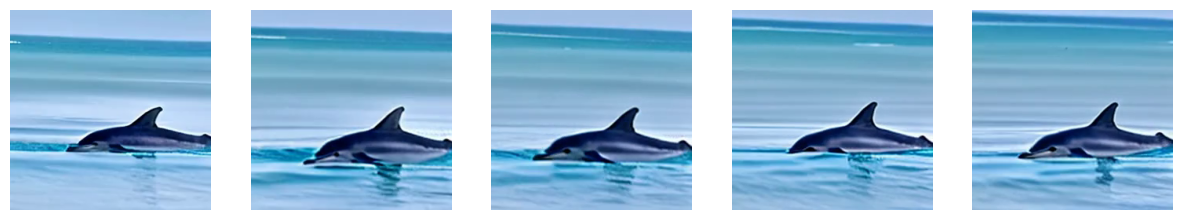

In [33]:
import cv2
import matplotlib.pyplot as plt
def get_video_frames(video_path):  # Define the function within this code block
    """Extract frames from the video."""
    video = cv2.VideoCapture(video_path)
    frames = []
    success, image = video.read()
    while success:
        frames.append(image)
        success, image = video.read()
    video.release()
    return frames

def display_frames(frames, n=5):
    """Display n evenly spaced frames from the video."""
    plt.figure(figsize=(15, 5))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(cv2.cvtColor(frames[len(frames) // n * i], cv2.COLOR_BGR2RGB))
        plt.axis('off')
    plt.show()

# Extract and display frames from the video
frames = get_video_frames("/content/MotionDirector/outputs/inference/A_dolphin_in_a_ocean_captured_with_a_zoom_in_0.mp4")
display_frames(frames)